In [1]:
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
from sklearn.feature_extraction.text import  CountVectorizer 
from sklearn.decomposition import LatentDirichletAllocation

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis 
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

%run ./Text_Normalization_Function.ipynb 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [2]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [3]:
#Upload dataset
df = pd.read_csv (r'Reviews.csv')
reviews = df["Text"]
reviews


0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

C:\Users\xiong\AppData\Local\Temp/ipykernel_33776/3526566498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_s['datestamp']=time_s.apply(datetime.fromtimestamp)


Dimensions for test data: (10000, 2)
Dimensions for training data: (1000, 2) 

First 5 rows in test dataset: 
                                                      Text  Polarity
161464  I rarely write reviews, but concerning this pr...   negtive
14840   I am on a diet, but there are there are times ...  positive
387450  I love this water so much, I just subscribed t...  positive
140753  Love this stuff, enhances almost any grilled f...  positive
404480  I have tried the natural, pepper, and rosemary...  positive 

First 5 rows in  training dataset: 
                                                      Text  Polarity
221892  These are really good, I usually get the kind ...  positive
554508  I used to buy Tchibo Express coffee and Lavazz...  positive
538221  This chai tea focuses on spices such as clove,...  positive
312354  Disappointed that the bottles were plastic.  I...  positive
480985  reed's specializes in lots of ginger-based pro...  positive


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xiong\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


I like this brand a lot 
Scores: {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612} 

I love the function of it 
Scores: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369} 

Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". 
Scores: {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5664} 

I hate the plot of this product :( 
Scores: {'neg': 0.569, 'neu': 0.431, 'pos': 0.0, 'compound': -0.765} 

Review:-
I love the taste and texture and it's just the right amount of hot spicy.  Yum!  Great flavor!  My problems with it are the extremely high sodium and lack of much tofu.  There are NOT chunks like the photo, the few there are dissolve into tiny pieces that are weirdly crunchy.  Still yummy and a filling snack, just not that nutritious.  It's not vegetarian so don't let the tofu content fool you... :)
Actual Labeled Sentiment: positive

Review:-
Love these packs. I have made pretzel dogs, bites and sticks. I  have even u

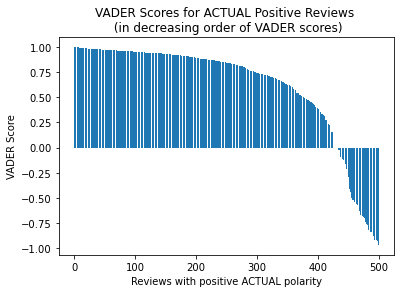

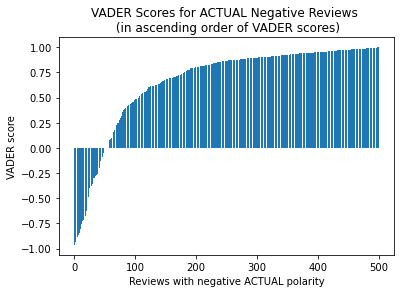

Accuracy rate:  0.7244


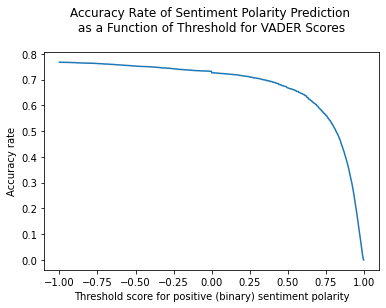

In [4]:
%run ./Sentiment_Analysis.ipynb 

In [16]:

sample_pos=test_data.loc[test_data['vader_sentiment']=='positive']['Text']
sample_neg=test_data.loc[test_data['vader_sentiment']=='negative']['Text']


In [17]:
normalized_reviews_pos = normalize_corpus(sample_pos) 
normalized_reviews_pos



['rarely write review concern product unfortunately suddenly develop caffeine allergy use substitute use postum child longer available cafix rom kaffree quite reasonable use bit together fine celestial many good product roastaroma tea small large amount stuff absolutely vile medicinal taste nothing taste like tea coffee poor substitute really know receive star review good luck want first locally buy pack offer thru amazon amazon vendor fine amazon kindly refund money',
 'diet time like small snack pack melba toast cut small dry cracker around calorie jerky tasty chewy sweet right amount food take lot long eat packet jerky pack melba toast highly recommend jerky people want something low fat nibble beauty buy bulk think save real money oppose retail convenient always hand click away',
 'love water much subscribe month sort amused bewildered reviewer claim fruit flavor water mild flavor blackberry particular somewhat strong almost jam like taste overpowering think could strong without ne

In [18]:
bow_vectorizer_pos = CountVectorizer(max_features=1000)
bow_reviews_pos = bow_vectorizer_pos.fit_transform(normalized_reviews_pos)

In [19]:
pd.DataFrame(data = bow_reviews_pos.todense(), columns = bow_vectorizer_pos.get_feature_names())

,able,absolutely,acid,across,actual,actually,add,added,addict,addition,...,write,wrong,year,yes,yet,yogurt,young,yum,yummy,zico
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Coherence Scores

# topic modeling evaluation
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
#tokenizing the corpus
reviews_corpus_tokenized = [tokenize_text(normalized_reviews_pos[doc_id]) for doc_id in range(len(normalized_reviews_pos))]

#Dictionary of the corpus:
reviews_dictionary = Dictionary(reviews_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
reviews_corpus_bow = [reviews_dictionary.doc2bow(doc) for doc in reviews_corpus_tokenized]



In [21]:
#fit LDA with 4 topics:
lda_reviews_4_topics = LatentDirichletAllocation(n_components=4, max_iter=40,
                                              doc_topic_prior = 0.24,
                                              topic_word_prior = 0.24).fit(bow_reviews_pos)
#Log-Likelihood
print("Log-Likelihood (higher values are better) for 4-topic model: ", lda_reviews_4_topics.score(bow_reviews_pos))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_reviews_4_topics.perplexity(bow_reviews_pos))

#coherence score for 4 topics:
topic_topwords_4_topics = get_topic_words(vectorizer = bow_vectorizer_pos, lda_model = lda_reviews_4_topics, n_words=20)
cm_4_topics = CoherenceModel(topics=topic_topwords_4_topics, 
                             corpus =  reviews_corpus_bow, 
                             dictionary = reviews_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_4_topics.get_coherence(), 4))

Log-Likelihood (higher values are better) for 4-topic model:  -1609271.6894473766
Perplexity (lower values are better):  497.93961122775744
Coherence score for the model: (higher values are better) -1.9894


In [22]:
#fit LDA with 5 topics:
lda_reviews_5_topics = LatentDirichletAllocation(n_components=5, max_iter=50,
                                              doc_topic_prior = 0.25,
                                              topic_word_prior = 0.25).fit(bow_reviews_pos)
#Log-Likelihood
print("Log-Likelihood (higher values are better) for 5-topic model: ", lda_reviews_5_topics.score(bow_reviews_pos))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_reviews_5_topics.perplexity(bow_reviews_pos))

#coherence score for 5 topics:
topic_topwords_5_topics = get_topic_words(vectorizer = bow_vectorizer_pos, lda_model = lda_reviews_5_topics, n_words=20)
cm_5_topics = CoherenceModel(topics=topic_topwords_5_topics, 
                             corpus =  reviews_corpus_bow, 
                             dictionary = reviews_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_5_topics.get_coherence(), 4))


Log-Likelihood (higher values are better) for 5-topic model:  -1603444.6811144562
Perplexity (lower values are better):  486.86715229660894
Coherence score for the model: (higher values are better) -2.0327


In [38]:
#fit LDA with 6 topics:
lda_reviews_6_topics = LatentDirichletAllocation(n_components=6, max_iter=60,
                                              doc_topic_prior = 0.26,
                                              topic_word_prior = 0.26).fit(bow_reviews_pos)
#Log-Likelihood
print("Log-Likelihood (higher values are better) for 6-topic model: ", lda_reviews_6_topics.score(bow_reviews_pos))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_reviews_6_topics.perplexity(bow_reviews_pos))

#coherence score for 6 topics:
topic_topwords_6_topics = get_topic_words(vectorizer = bow_vectorizer_pos, lda_model = lda_reviews_6_topics, n_words=20)
cm_6_topics = CoherenceModel(topics=topic_topwords_6_topics, 
                             corpus =  reviews_corpus_bow, 
                             dictionary = reviews_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_6_topics.get_coherence(), 4))

Log-Likelihood (higher values are better) for 6-topic model:  -1604762.4534373924
Perplexity (lower values are better):  489.3494355998216
Coherence score for the model: (higher values are better) -2.1411


In [24]:
#fit LDA with 7 topics:
lda_reviews_7_topics = LatentDirichletAllocation(n_components=7, max_iter=70,
                                              doc_topic_prior = 0.27,
                                              topic_word_prior = 0.27).fit(bow_reviews_pos)
#Log-Likelihood
print("Log-Likelihood (higher values are better) for 7-topic model: ", lda_reviews_7_topics.score(bow_reviews_pos))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_reviews_7_topics.perplexity(bow_reviews_pos))

#coherence score for 7 topics:
topic_topwords_7_topics = get_topic_words(vectorizer = bow_vectorizer_pos, lda_model = lda_reviews_7_topics, n_words=20)
cm_7_topics = CoherenceModel(topics=topic_topwords_7_topics, 
                             corpus =  reviews_corpus_bow, 
                             dictionary = reviews_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_7_topics.get_coherence(), 4))


Log-Likelihood (higher values are better) for 7-topic model:  -1603810.4500880837
Perplexity (lower values are better):  487.5548848882855
Coherence score for the model: (higher values are better) -2.0742


In [25]:
lda_reviews_pos= LatentDirichletAllocation(n_components = 5, max_iter=50,
                                           doc_topic_prior = 0.25,
                                           topic_word_prior = 0.25).fit(bow_reviews_pos)

In [26]:
no_top_words = 20
display_topics(lda_reviews_pos, bow_vectorizer_pos.get_feature_names(), no_top_words)

Topic 0:
coffee cup flavor like taste good strong roast use blend great brew pod bean love dark keurig bitter smooth bold
Topic 1:
taste like flavor good eat great use chocolate love snack chip sweet add really sugar little oil coconut butter salt
Topic 2:
tea like taste drink water use flavor good product bottle well really love great day green sugar work much little
Topic 3:
amazon order buy product price store great box love good bar purchase time bag pack best local free package candy
Topic 4:
food dog treat cat love eat like give good old time product day year chew chicken little use think really


In [27]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_reviews_pos,bow_reviews_pos, bow_vectorizer_pos, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  26.188241
2       51.163364 -159.968018       2        1  20.822363
3      -73.144554   21.523815       3        1  20.494208
4      -66.410133 -110.606438       4        1  19.422651
0       54.417324   12.443444       5        1  13.072538, topic_info=         Term         Freq        Total Category  logprob  loglift
164    coffee  3411.000000  3411.000000  Default  30.0000  30.0000
343      food  2448.000000  2448.000000  Default  29.0000  29.0000
884       tea  2312.000000  2312.000000  Default  28.0000  28.0000
252       dog  1859.000000  1859.000000  Default  27.0000  27.0000
214       cup  1430.000000  1430.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
260     drink   230.969725  1297.819806   Topic5  -4.9881   0.3085
379     green   197.726988   564.584957   Topic5  -5.1435   0.9855
280     enjoy   200.911232   745.312454   Topic5  -5.1275   0.7237
318  favorite   199.166835   769.884119   Topic5  -5.1363   0.6826
707    really   212.411617  1690.817195   Topic5  -5.0719  -0.0398

[334 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
6         1  0.588093     add
6         2  0.273892     add
6         4  0.037208     add
6         5  0.100255     add
21        1  0.997005  almond
...     ...       ...     ...
992       3  0.373547    year
992       4  0.373547    year
992       5  0.048816    year
995       1  0.989949  yogurt
999       2  0.985518    zico

[539 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 5, 1])

In [28]:
word_weights_pos = lda_reviews_pos.components_ / lda_reviews_pos.components_.sum(axis=1)[:, np.newaxis]
pd.DataFrame(word_weights_pos.T, index = bow_vectorizer_pos.get_feature_names()).T

,able,absolutely,acid,across,actual,actually,add,added,addict,addition,...,write,wrong,year,yes,yet,yogurt,young,yum,yummy,zico
0,0.000584,0.000321,0.000725,0.000008,0.000234,0.001055,0.002863,0.000185,0.000221,0.000201,...,0.000164,0.000693,0.001349,0.000275,0.001147,0.000008,0.000007,0.000250,0.000008,0.000007
1,0.000570,0.000873,0.000410,0.000154,0.000107,0.001450,0.008391,0.000847,0.000494,0.000868,...,0.000240,0.000412,0.000936,0.000674,0.000857,0.001458,0.000004,0.001021,0.001798,0.000004
2,0.000734,0.000748,0.000806,0.000133,0.000462,0.002659,0.004914,0.000605,0.000110,0.000509,...,0.000364,0.000264,0.002394,0.000725,0.001161,0.000005,0.000317,0.000225,0.000005,0.001298
3,0.002552,0.001253,0.000005,0.000739,0.000556,0.000788,0.000005,0.000005,0.000603,0.000005,...,0.000497,0.000793,0.006626,0.000437,0.000169,0.000005,0.000093,0.000005,0.000946,0.000005
4,0.000865,0.001067,0.000238,0.000129,0.000022,0.002029,0.000711,0.000117,0.000109,0.000221,...,0.000375,0.000491,0.006995,0.000676,0.000777,0.000005,0.000986,0.000005,0.000005,0.000005


In [29]:
word_weights_pos= lda_reviews_pos.components_ / lda_reviews_pos.components_.sum(axis=1)[:, np.newaxis]
word_weights_df_pos = pd.DataFrame(word_weights_pos.T, 
                               index = bow_vectorizer_pos.get_feature_names(), 
                               columns = ["Topic_" + str(i) for i in range(5)])
word_weights_df_pos

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
able,0.000584,0.000570,0.000734,0.002552,0.000865
absolutely,0.000321,0.000873,0.000748,0.001253,0.001067
acid,0.000725,0.000410,0.000806,0.000005,0.000238
across,0.000008,0.000154,0.000133,0.000739,0.000129
actual,0.000234,0.000107,0.000462,0.000556,0.000022
...,...,...,...,...,...
yogurt,0.000008,0.001458,0.000005,0.000005,0.000005
young,0.000007,0.000004,0.000317,0.000093,0.000986
yum,0.000250,0.001021,0.000225,0.000005,0.000005
yummy,0.000008,0.001798,0.000005,0.000946,0.000005


In [30]:
word_weights_df_pos.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
coffee,0.100669,0.000004,0.000005,0.000005,0.000005
cup,0.042191,0.000004,0.000005,0.000005,0.000005
flavor,0.022396,0.019592,0.016628,0.003140,0.003282
like,0.021592,0.024221,0.025826,0.004326,0.015762
taste,0.020304,0.024400,0.024886,0.005114,0.000005
good,0.017183,0.018947,0.015230,0.015801,0.010521
strong,0.012781,0.000548,0.002716,0.000005,0.000037
roast,0.012474,0.000004,0.000005,0.000005,0.000005
use,0.011707,0.011676,0.017963,0.005206,0.006268
blend,0.010425,0.000622,0.000689,0.000005,0.000005


In [31]:
word_weights_df_pos.sort_values(by='Topic_1',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
taste,0.020304,0.024400,0.024886,0.005114,0.000005
like,0.021592,0.024221,0.025826,0.004326,0.015762
flavor,0.022396,0.019592,0.016628,0.003140,0.003282
good,0.017183,0.018947,0.015230,0.015801,0.010521
eat,0.000008,0.013668,0.000005,0.001632,0.016292
great,0.010187,0.011735,0.007433,0.019080,0.005844
use,0.011707,0.011676,0.017963,0.005206,0.006268
chocolate,0.004800,0.010376,0.000005,0.002438,0.000005
love,0.008966,0.010018,0.007570,0.016725,0.019281
snack,0.000007,0.009157,0.000005,0.001732,0.000005


In [32]:
word_weights_df_pos.sort_values(by='Topic_2',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
tea,0.000008,0.000004,0.042832,0.000005,0.000005
like,0.021592,0.024221,0.025826,0.004326,0.015762
taste,0.020304,0.024400,0.024886,0.005114,0.000005
drink,0.006819,0.000004,0.019759,0.000005,0.000005
water,0.001814,0.000482,0.019134,0.000005,0.000549
use,0.011707,0.011676,0.017963,0.005206,0.006268
flavor,0.022396,0.019592,0.016628,0.003140,0.003282
good,0.017183,0.018947,0.015230,0.015801,0.010521
product,0.000016,0.006845,0.013326,0.024169,0.008278
bottle,0.000008,0.000004,0.009630,0.000005,0.000005


In [33]:
word_weights_df_pos.sort_values(by='Topic_3',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
amazon,0.000008,0.000004,0.000005,0.028851,0.000005
order,0.002412,0.000004,0.000284,0.025869,0.000005
buy,0.005475,0.003888,0.005295,0.024811,0.005983
product,0.000016,0.006845,0.013326,0.024169,0.008278
price,0.003492,0.000004,0.000842,0.022116,0.001393
store,0.000008,0.000004,0.000005,0.020022,0.000230
great,0.010187,0.011735,0.007433,0.019080,0.005844
box,0.002398,0.000605,0.000196,0.017202,0.000015
love,0.008966,0.010018,0.007570,0.016725,0.019281
good,0.017183,0.018947,0.015230,0.015801,0.010521


In [34]:
word_weights_df_pos.sort_values(by='Topic_4',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
food,0.000008,0.000004,0.000005,0.000005,0.048620
dog,0.000007,0.000004,0.000005,0.000005,0.036919
treat,0.000008,0.000004,0.000005,0.000005,0.022750
cat,0.000008,0.000004,0.000005,0.000005,0.020303
love,0.008966,0.010018,0.007570,0.016725,0.019281
eat,0.000008,0.013668,0.000005,0.001632,0.016292
like,0.021592,0.024221,0.025826,0.004326,0.015762
give,0.003502,0.003082,0.006071,0.002612,0.012022
good,0.017183,0.018947,0.015230,0.015801,0.010521
old,0.000124,0.000810,0.000699,0.001102,0.009717


In [37]:
lda_topic_weights_pos = lda_reviews_pos.transform(bow_reviews_pos)
#array of document "names" and topic "names" ("names" are just indecies)
doc_names = ["Doc_" + str(i) for i in range(len(normalized_reviews_pos))]
topic_names = ["Topic_" + str(i) for i in range(5)]

#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_topic_weights_pos, 4), columns=topic_names, index=doc_names)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,dominant_topic
Doc_0,0.0429,0.0050,0.4457,0.4695,0.0369,3
Doc_1,0.0055,0.4764,0.0056,0.3770,0.1355,1
Doc_2,0.0048,0.0048,0.9193,0.0664,0.0047,2
Doc_3,0.0193,0.0194,0.0195,0.7796,0.1620,3
Doc_4,0.1460,0.5105,0.0884,0.2453,0.0097,1
